# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [258]:
# Passo 3: Extração/Obtenção de Dados
import pandas as pd

df = pd.read_csv('advertising.csv')
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


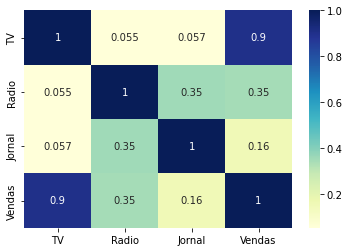

In [259]:
# Passo 5: Análise Exploratória
display(df.corr())

import seaborn as sns
import matplotlib.pyplot as plt

# criar gráfico
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

# exibir gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [260]:
# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)

# y -> é quem você quer prever
y = df['Vendas']

# x -> é quem vou usasr para prever o y, ou seja, o resto da tabela
x = df[['TV', 'Radio', 'Jornal']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [261]:
# importa ela
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria ela
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina ela
modelo_regressaolinear.fit(x_train, y_train)
modelo_arvoredecisao.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [262]:
# Passo 7: Interpretação de Resultados
from sklearn.metrics import r2_score

# fazer as previsões
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_test)
previsao_regressaolinear = modelo_regressaolinear.predict(x_test)

# comparar a previsão com o y_test
print(r2_score(y_test, previsao_arvoredecisao))
print(r2_score(y_test, previsao_regressaolinear))

0.9637778132606327
0.8776868643426223


#### Visualização Gráfica das Previsões

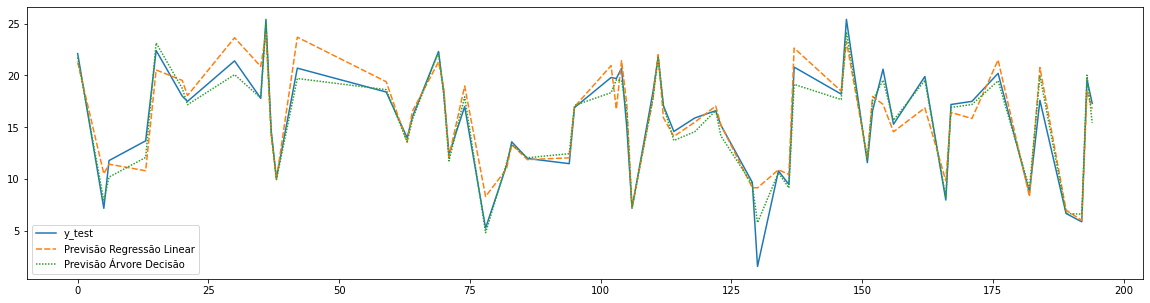

In [263]:
df_auxiliar = pd.DataFrame()
df_auxiliar['y_test'] = y_test
df_auxiliar['Previsão Regressão Linear'] = previsao_regressaolinear
df_auxiliar['Previsão Árvore Decisão'] = previsao_arvoredecisao

plt.figure(figsize=(20, 5))
sns.lineplot(data=df_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [264]:
df_novo = pd.read_csv('novos.csv')
display(df_novo)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [265]:
previsao = modelo_arvoredecisao.predict(df_novo)
df_novo['Vendas'] = list(map(lambda venda: round(venda, 1), previsao))

In [266]:
display(df_novo)

,TV,Radio,Jornal,Vendas
0,23.1,3.8,69.2,7.5
1,44.5,0.0,5.1,9.1
2,170.2,45.9,0.0,20.3
